# What is an agent? 

We're constantly bombarded with buzzwords like Langchain, AutoGPT, Generative Agents, CAMEL, and BabyAGI, just to name a few. But when we try to define what an agent really is, we often find ourselves grasping at straws. Sure, we could say they're "anything that works to achieve a goal," but let's be honest, that doesn't quite hit the mark, does it?

Imagine agents starting their journey as a "tabula rasa" or blank slate, with unlimited potential to grow and adapt. As they encounter new experiences, they accumulate knowledge, gradually shaping their state and context. It's a bit like a newborn baby, who starts off knowing nothing but eventually learns from its surroundings and develops into a unique individual with its own set of skills, preferences, and perspectives.

In this blog post, we'll take a deep dive into the world of autonomous agents. We'll explore their philosophical roots and reason from first principles to better understand their nature. We'll also introduce an innovative data structure and algorithm that allows these agents to learn, evolve, and adapt over time. So, buckle up and get ready for an exciting journey into the realm of adaptive AI systems!


## Understanding Agents: The Chessboard Allegory
To better comprehend the nature of autonomous agents, let's dive into a captivating analogy that captures their essence: the Chessboard Allegory. Picture a vast chessboard, where each piece symbolizes an agent, and every square represents a potential state or context. As the game progresses, the pieces move and interact, evolving independently but with shared origins, similar to how agents develop through their experiences.

In [1]:
# %pip install chess openai networkx matplotlib numpy

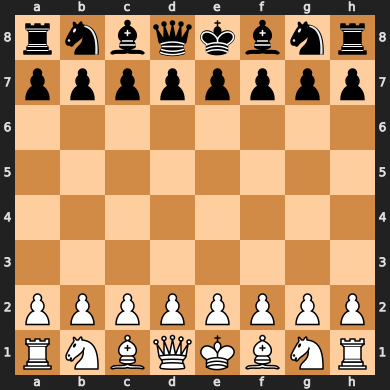

In [2]:
import chess
import chess.svg
import chess.pgn

import matplotlib.pyplot as plt
import numpy as np

game = chess.pgn.Game()
board = game.board()
board

The state of a piece is determined by its position on the board, while the context is defined by the pieces surrounding it. Just as each chess piece can move and change its position on the board, agents can adapt and evolve to better interact with their environment.

## Receiving Instructions: The Chess Player's Hand

Just as a chess player studies the board and decides which piece to move and where, agents receive instructions from users or other agents that guide their actions. These instructions come in various forms, such as goals to achieve, problems to solve, or specific tasks to perform. As the hand of the chess player hovers over the board, selecting a piece and making a move, the agent interprets the instruction and decides how to act accordingly.

To better understand this process, let's imagine a scenario in which the Chess agent receives some human instruction:

"Let's use the Ruy Lopez opener"

This instruction is not always something that can be done in a single action. An opener in chess is not a single move but rather a series of moves, usually involving the development of pawns and minor pieces in the first few moves of the game. It is more of a strategic plan or tactic than a single move. It's important that we keep track of this move somehow so that for our next move we can remember the tactic that we are trying to implement. 

## Next Step: Enter LLMs

Now that we've explored state, context, and user instruction in our Chess analogy, it's time to illustrate how this information is processed to form a prompt for a language model, such as GPT-4. In this example, we'll use a simple Python code snippet to demonstrate how an agent might request and receive a response from the language model, leveraging the Chess context and instruction.

In [3]:
# from getpass import getpass
# import openai
# secret = getpass("Enter your OpenAI api key: ")
# openai.api_key = secret

First, we get a serializable representation of our board state. Serializable is just a fancy way of saying that it can be made into a format that can be stored, transmitted or reconstructed later

In [4]:
state = board 
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


Okay, so we have a representation that is just a bunch of characters. Great. 

Now let's think about context. If we have state already, why do we need something else? Imagine you are playing chess. You would need to know a bunch of information in order to achieve your goal (winning, probably, let's be honest). You would need to know what moves you have made in the past, what moves your opponent has made. Maybe you are playing with a buddy and they have had a few beers, so that might influence your strategy. 

We can even get at "theory of mind" by saying something like "I don't think my opponent knows the Ruy Lopez opener". As humans there are tons of external data points that influence our decision making. But I'm getting carried away! Let's just keep it simple and say that right now, we don't have any context because nothing has happened. 

In [5]:
context = "" # context is empty at first because we haven't done anything yet
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

*


Okay, now here's where it gets interesting. In order for any of this to work, we need the Promethean spark of a human input. My assertion is that AI agents are inert until prompted by something. At least we can say that is true about LLMs. They need, at some point a real-live person to push the button. We can actually tell them to figure out the next action in a chain of actions, (ala AutoGPT) or the next action to request from other Agents (ala Generative Agents, GPT Swarm) but the lead domino is still a human being. Let's give our Chess agent a goal: 

In [6]:
instruction = "Let's use the Ruy Lopez opener."

Now we need some way of taking all of these three pieces and putting them together: 

In [7]:
def generate_move_prompt(state, context, instruction):
    return f"Current board state: {state}\nSurrounding context: {context}\nUser instruction: {instruction}\nWhat is the next best move? Respond in UCI format fromSquaretoSquare. Respond only with the UCI move."

prompt = generate_move_prompt(state, context, instruction)
print(prompt)

Current board state: r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Surrounding context: 
User instruction: Let's use the Ruy Lopez opener.
What is the next best move? Respond in UCI format fromSquaretoSquare. Respond only with the UCI move.


We almost have an agent! There is just one more thing that we need to do - this agent will be using an LLM, specifically OpenAI. 

In [8]:
def get_chess_move(prompt):
    response = openai.Completion.create(
        engine="text-davinci-002",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.8,
    )

    return response.choices[0].text.strip()

response = get_chess_move(prompt)
print(response)

NameError: name 'openai' is not defined

There are some things we shouldn't pass over here. Specificially let's look at the parameters we are giving to the api: 
```python
  engine="text-davinci-002",
  prompt=prompt,
  max_tokens=50,
  n=1,
  stop=None,
  temperature=0.8,
```

We can change the model, or engine, the number of tokens, or the length of the response, and the temperature. Temperature we can think of like the "randomness" of the response. Think of it kind of like creativity -- you can have a rigid temperature that will give you more predictable answers, or you can have a creative temperature that might play fast and loose with everything.

In [ ]:
node = game.add_variation(chess.Move.from_uci(response))

In [ ]:
import json
node.comment = json.dumps({ "prompt": prompt, "llm": { "engine": "text-davinci-002", "temperature": 0.8 }})

### Aside, on building agent applications...

Here's a cool tidbit -- we are using the python chess library which can tell us if a move is legal! Because we don't always know what we are going to get from an LLM, we can implement our code in a way that validates the response.

Try plugging in an invalid chess move in the previous cell and see what happens. 

## Understanting the new state

Something special just happened, and it was subtle enough that it might be easily missed. We started with one state, talked to an LLM and got a new state. We can think about the two different states as a [graph](https://en.wikipedia.org/wiki/Graph_(abstract_data_type) which is a special idea in computer science that describes connections between entities. We start with state 1, and then through some process get to state 2. Try running the following cell:

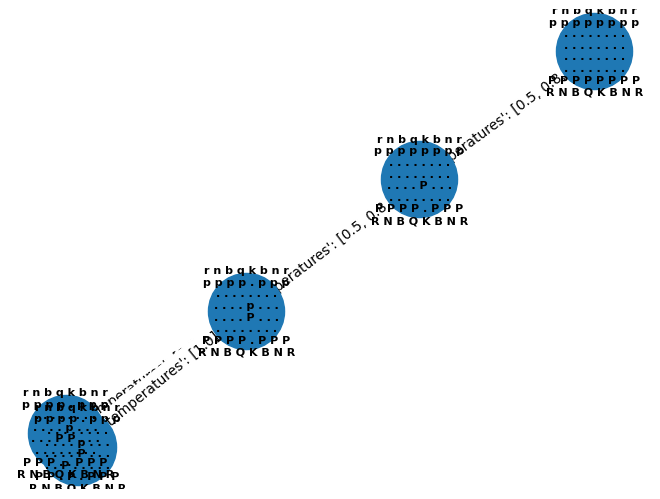

In [ ]:
import networkx as nx
import chess.pgn

def create_state_tree(game):
    G = nx.DiGraph()
    
    def build_tree(node, parent=None):
        if node.comment:
          data = json.loads(node.comment)
        else: 
          data = {}

        state_id = str(node.board())
        llm = data.get("llm", None)
        temperatures = data.get("llm", {"temperatures": []}).get("temperatures")
        prompt = data.get("prompt", None)

        if state_id not in G:
            G.add_node(state_id, label=node.board(), **data)
        
        if parent is not None:
            G.add_edge(parent, state_id, temperatures=temperatures)
        
        for child in node.variations:
            build_tree(child, state_id)
    
    build_tree(game)
    return G

def plot_state_tree(state_tree):
    pos = nx.kamada_kawai_layout(state_tree)
    nx.draw(state_tree, pos, with_labels=True, node_size=3000, font_size=8, font_weight="bold")
    nx.draw_networkx_edge_labels(state_tree, pos)
    plt.show()


state_tree = create_state_tree(game)
plot_state_tree(state_tree)

The circles in the diagram (called Nodes in a graph) are our representations of state/context, which we have reduced here to just the chess board, for ease of visualization. Actually, it is all of the context/state at that point in the graph. 

The arrows in the diagram (called Edges) describe how we got from Node 1 to Node 2. How did we get from the new Chess game to the first move? We called the LLM with parameters and a prompt to ask it for a next move. 

*Actually a few more things happened like python chess validating the response and some other stuff, but we're simplifying all that for the sake of the example*

Let's modify our `get_chess_move` function to take the temperature as a parameter: 

In [ ]:
def get_chess_move(state, context, instruction, temperature=0.8, max_attempts=3):
    for attempt in range(max_attempts):
        prompt = generate_move_prompt(state, context, instruction)
        response = openai.Completion.create(
            engine="text-davinci-002",
            prompt=prompt,
            max_tokens=50,
            n=1,
            stop=None,
            temperature=temperature,
        )

        move = response.choices[0].text.strip()

        # Check if the move is valid UCI-formatted and legal in the current position
        try:
            chess.Move.from_uci(move)
            if move in [m.uci() for m in chess.Board(state).legal_moves]:
                return move
        except ValueError:
            pass
    
    # If a valid move isn't found after max_attempts, return None or raise an exception
    return None


Next, create a function that generates and adds moves with different hyperparameters to the game:

In [ ]:
def add_moves_with_hyperparameters(game, move_count=3):
    for i in range(move_count):
        node = game.end()
        state = node.board().fen()
        context = json.dumps({"history": [m.uci() for m in node.board().move_stack]})
        instruction = "Continue the Ruy Lopez opening"

        for temperature in [0.5, 0.8, 1.0]:
            response = get_chess_move(state, context, instruction, temperature)
            if response is not None:
                move = chess.Move.from_uci(response)

                # Check if a child node with the same move already exists
                existing_child = None
                for child in node.variations:
                    if child.move == move:
                        existing_child = child
                        break

                if existing_child is not None:
                    # If the child node already exists, append the new temperature to the edge attribute
                    data = json.loads(existing_child.comment)
                    data["llm"]["temperatures"].append(temperature)
                    existing_child.comment = json.dumps(data)
                else:
                    # If the child node does not exist, create a new node with the move and temperature
                    child_node = node.add_variation(move)
                    child_node.comment = json.dumps({
                        "llm": {"temperatures": [temperature]}
                    })


Let's update `plot_state_tree` to show the temperatures we used: 

In [ ]:
from layout import hierarchical_layout

def plot_state_tree(state_tree):
    pos = hierarchical_layout(state_tree)
    nx.draw(state_tree, pos, with_labels=True, node_size=3000, font_size=8, font_weight="bold")
    nx.draw_networkx_edge_labels(state_tree, pos)
    plt.show()

Then, generate the game with branches that represent different hyperparameters and visualize the resulting state tree:

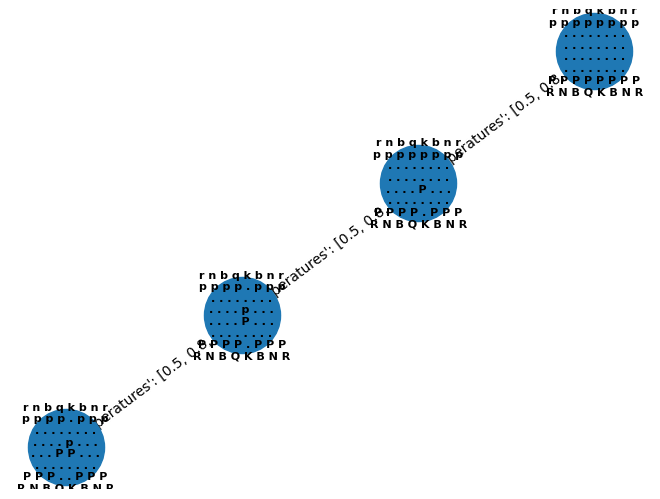

In [ ]:
game = chess.pgn.Game()

add_moves_with_hyperparameters(game, move_count=3)

state_tree = create_state_tree(game)
plot_state_tree(state_tree)


You can experiment with the above by changing out the hyperparameters, trying new moves, etc. See if you can get the graph to diverge!